<a href="https://colab.research.google.com/github/alexOdin18/Yandex_Practicum/blob/main/4_ecom_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Описание и цели проекта 

Компания - интернет-магазин «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить **определяющие успешность игры закономерности**. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
На исследовнаие предоставлены данные до 2016 года. Нужно предоставить критерии успешности игр для закупки на 2017 год.

*Примечание*  
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

<Strong>Цель:</Strong> выявить параметры влияющие на успешность игры.

## 1. Импорт данных. Предварительный анализ.

Импортируем необходимые библиотеки.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
pd.options.display.float_format ='{:,.2f}'.format
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 

Импортируем данные.

In [ ]:
df = pd.read_csv('/datasets/games.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,nan,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,nan,NaN,NaN


На первый взгляж в данных есть пропуски. Столбец Year_of_release имеет неверный тип данных. Названия столбцов имеют разные регистры.

Посмотрим на сводную информацию по данным.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В данных присутствует много пропусков. Особенно в стоблцах Critic_Score, User_Score и Rating.

Посмотрим на количество дубликатов.

In [ ]:
df.duplicated().sum()

0

Названия столбцов.

In [ ]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Уникальные жанры.

In [ ]:
df['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

В жанрах присутствуют пропущенные значения. Их всего 2. Посмотрим на эти строки.

In [ ]:
df[df['Genre'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,"1,993.00",NaN,1.78,0.53,0.00,0.08,nan,NaN,NaN
14244,NaN,GEN,"1,993.00",NaN,0.00,0.00,0.03,0.00,nan,NaN,NaN


Данных в этих строках минимум, поэтому удалим эти строки на этапе предобработке данных.

### Вывод

Данные были импортированы и обработаны с помощью библиотеки pandas. В данных были обнаружены пропуски и ошибки в регистре. Далее проведем обработку данных: уберем пропуски и ошибки в данных, приведем к формату datetime стобец с годом выпуска игры. 

## 2. Предобработка данных

На данном этапе главная задача подготовить данные к исследовательскому анализу. Начнем с того, что уберем 2 строки с отсутствующими значениями по нужным нам параметрам, которые были обнаружены на предыдущем этапе.

In [ ]:
df.drop([659, 14244], inplace=True, axis=0)

In [ ]:
df = df.reset_index(drop=True)

Изменим на нижний регистр названия стобцов.

In [ ]:
df.columns = df.columns.str.lower()

In [ ]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [ ]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,nan,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,nan,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16444 non-null float64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Изменим тип данных в столбце year_of_release. Для этого сначала запоним пропуски на значение, которое будет выбиваться из общего набора данных, например, 3000. Уточнить какого именно года выпуска игра не представляется возможным.

In [ ]:
df.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

In [ ]:
df['year_of_release'] = df['year_of_release'].fillna(2030)

Далее переведем значения в целые числа int. 

In [ ]:
df['year_of_release'] = df['year_of_release'].astype('int')

In [ ]:
df['year_of_release'].fillna(2030).astype('int')

0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16708    2016
16709    2006
16710    2016
16711    2003
16712    2016
Name: year_of_release, Length: 16713, dtype: int64

In [ ]:
df['year_of_release'].head()

0    2006
1    1985
2    2008
3    2009
4    1996
Name: year_of_release, dtype: int64

Изменили тип данных. Теперь будет удобнее работать с целыми числами.

В трех стобцах critic_score, user_score, rating есть пропуски, причем их значимое количество. Значение в стобцах critic_score и user_score имеют численный тип данных, в то время как rating обозначают буквой, а значит это категориальный тип данных. Посмотрим какие категории есть в этом столбце.  

In [ ]:
df['rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

Всего 8 категорий, причем на 4 из них: E, T, M, E10+ приходится 99% значений.

Посмотрим, что обозначают эти буквы.
<p> E - everyone - для всех возрастных групп.
<p> T - teen - для подростков от 13 лет и старше
<p> M - 17+
<p> E10+ - 10+
<p> EC - Early Childhood - для дошкольной аудитории. Утратил силу после 2018
<p> K-A - Kids to Adults - эти игры по мнению ESRB нарвятся и детям и взрослым. Утратил силу после 1998
<p> RP - оценки еще нет
<p> AO - 18+ только для взрослых.

Посмотрим данные в столбце user_score. Интересно то, что в этом столбце численные значения, но тип данных object, что говорит о том, что в наборе присутствуют строковые значения. 

In [ ]:
df['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.3       2
0.6       2
0.3       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

Действительно, в данных присутствует аббревиатура "tbd", которая расшифровывается, как to be announced, т.е рейтинг еще не сформировался. Нет рейтинга - нет значений, я так считаю, мне кажется у пропущенных значений незаслуженно плохая реппутация :)).  

In [ ]:
df['user_score'].replace("tbd", np.nan, inplace=True)

In [ ]:
df['user_score'] = df['user_score'].astype('float')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Кажется целью этого раздела была борьба с пропусками, а мы их только увеличили :) Скорее всего пропуски в столбцах critic_score, user_score, rating связаны с попросту отсутствием на момент выгрузки данных по оценкам, т.е они еще не сформировались. Пропуски по дате релиза заполнили нулем, чтобы обработать значения и перевести их в формат int. 

Сделаем необходимые расчеты и добавим их в таблицу. Посчитаем суммарные продажи по всем регионам.

In [ ]:
df['general_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [ ]:
df['general_sales']

0       82.54
1       40.24
2       35.52
3       32.77
4       31.38
         ... 
16708    0.01
16709    0.01
16710    0.01
16711    0.01
16712    0.01
Name: general_sales, Length: 16713, dtype: float64

Чтобы удобно было обращаться к данным переведем строковые значения в нижний регистр.

In [ ]:
to_low = ['name', 'platform', 'genre', 'rating']
for column in to_low:
    df[column] = df[column].str.lower()

### Вывод

На этапе предобработки данных были обнаружены и обработаны пропущенные значения. В таблицу добавлен новый стобец с расчетом общего объема продаж. Данные были приведены к удобному для работы формату.  

## 3. Исследовательский анализ

На данном этапе нам нужно будет оценить распределение данных относительно интересующих нас условий. Какие зависимости прослеживаются относительно главного признака - объем продаж.

- Посмотрим сколько игр выпускалось в разные годы.

In [ ]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,general_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.00,8.00,e,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,nan,nan,NaN,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.00,8.30,e,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.00,8.00,e,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,nan,nan,NaN,31.38


Text(0.5, 1.0, 'Распределение количества выпускаемых игр по годам')

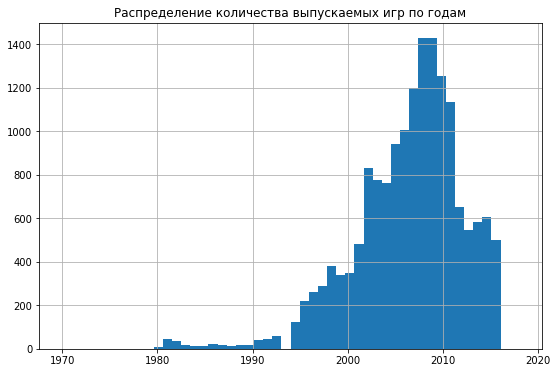

In [ ]:
df['year_of_release'].hist(bins=50, range=(1970, 2018), figsize=(9, 6))
plt.title('Распределение количества выпускаемых игр по годам')

По графику виден бурный рост гейм индустрии с 2000 года до 2010. Далее количество выпускаемых игра резко снижается. Также видим, что диаграмма распределения скошена влево. Стоит ли учитывать данные по играм, которые выпустили ранее 1990 года? Думаю, что нет, так как индустрия сильно изменилась и профессиональные игроки появились только спустя несколько лет.    

- Посмотрим, как менялись продажи по платформам. Нам нужно выбрать платформы которые будут на пике популярности для 2017 года. Посмотрим за какой характерный срок появляются новые и исчезают старые платформы. Так мы определим жизненный цикл платформы и сможем дать рекомендации по тому какую платформу стоит выбрать для актуального периода.

Выберем топ самых продаваемых платформ.

In [ ]:
df.groupby('platform')['general_sales'].sum().sort_values(ascending=False)

platform
ps2    1,255.77
x360     971.42
ps3      939.65
wii      907.51
ds       806.12
ps       730.86
gba      317.85
ps4      314.14
psp      294.05
pc       259.52
3ds      259.00
xb       257.74
gb       255.46
nes      251.05
n64      218.68
snes     200.04
gc       198.93
xone     159.32
2600      96.98
wiiu      82.19
psv       54.07
sat       33.59
gen       28.35
dc        15.95
scd        1.86
ng         1.44
ws         1.42
tg16       0.16
3do        0.10
gg         0.04
pcfx       0.03
Name: general_sales, dtype: float64

Возьмем топ 6 платформ по продажам за все время и построим для них график продаж по годам. Это нужно, чтобы определить срок жизни платформы.

In [ ]:
top_platform = ['ps2', 'x360', 'ps3', 'wii', 'ds', 'ps']

In [ ]:
df_platform_top = df.query('platform in @top_platform')\
.groupby(['platform', 'year_of_release'])['general_sales']\
.sum()\
.reset_index()

In [ ]:
df_platform_top

,platform,year_of_release,general_sales
0,ds,1985,0.02
1,ds,2004,17.27
2,ds,2005,130.14
3,ds,2006,119.81
4,ds,2007,146.94
...,...,...,...
68,x360,2013,88.58
69,x360,2014,34.74
70,x360,2015,11.96
71,x360,2016,1.52


Теперь построим график общих объемов продаж для каждой платформы по годам.

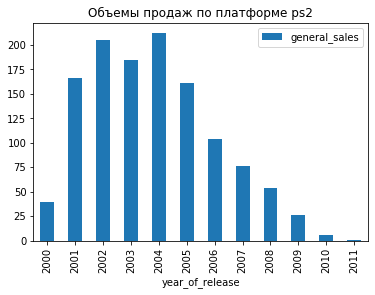

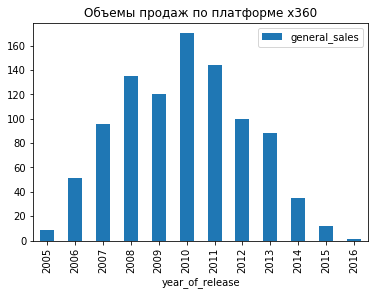

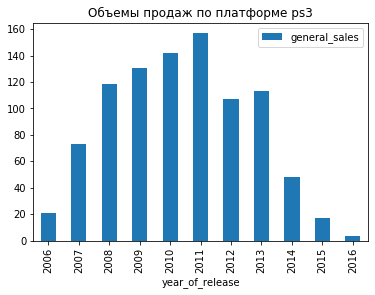

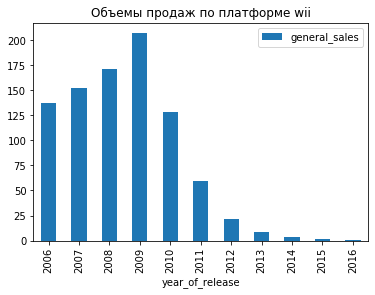

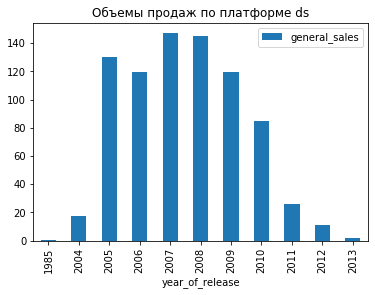

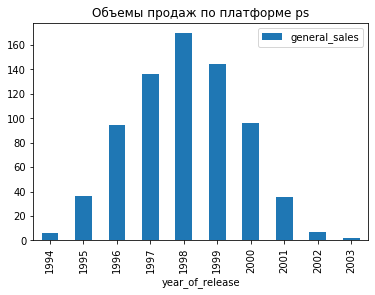

In [ ]:
for platform in top_platform:
    df_platform_top[(df_platform_top['platform'] == platform) & (df_platform_top['year_of_release'] < 2030)]\
    .plot(x='year_of_release', y='general_sales', kind='bar', title='Объемы продаж по платформе ' + platform)
    plt.show()

Как видно из графиков время на которое приходится большая часть продаж составляет около 5 лет. В течении 4-х - 5 лет наблюдается интенсивный рост , а затем постепенное угасание. Характерный пример сменяемости платформ ps2 и ps3: в течении 5 лет с 2001 до 2005 года плафторма была очень популярна, затем с появлением в 2006 году ps3 объемы продаж игр на ps2 стали сокращаться и окончательно сошли на нет только в 2011, как раз когда наблюдался пик популярности ps3. Таким образом можно подитожить, что новые платформы набирают пик популярности в среднем за 5 лет и устаревают также примерно за 5 лет. Средний срок жизни платформы 10 лет.  

Мы выяснили, что срок жизни платформы составляет 10 лет. Так как нас интересуют, параметры влияющие на успешность игры в 2017 году, то следует анализировать отрезок времени за предыдущие 5 лет. Соответственно период с 2012 года и будет для нас <strong>актуальным. 

 - Посмотрим какие в актуальном периоде популярные платформы и на каком этапе жизненного цикла они находятся.

In [ ]:
df_actual = df.query('year_of_release > 2011')
df_actual.reset_index(drop=True, inplace=True)

In [ ]:
df_actual.groupby('platform')['general_sales'].sum().sort_values(ascending=False)

platform
ps4    314.14
ps3    297.10
x360   246.72
3ds    195.80
xone   159.32
wiiu    82.19
pc      66.41
wii     51.70
psv     49.44
ps2     22.21
ds      15.89
psp     15.71
2600    10.50
xb       6.17
gba      4.97
ps       3.28
gc       2.20
gb       1.03
n64      0.67
Name: general_sales, dtype: float64

По объему продаж в лидерах ps3, но как мы видели жизненный цикл у данной платформы может иметь низходящий тренд, а, например, ps4 наоборот набирать популярность. 

Составим список платформ по убыванию объемов продаж.

In [ ]:
dict_platform = list(
    df_actual.groupby('platform')['general_sales'].sum().sort_values(ascending=False).index
)
dict_platform

['ps4',
 'ps3',
 'x360',
 '3ds',
 'xone',
 'wiiu',
 'pc',
 'wii',
 'psv',
 'ps2',
 'ds',
 'psp',
 '2600',
 'xb',
 'gba',
 'ps',
 'gc',
 'gb',
 'n64']

Сгруппируем данные.

In [ ]:
df_actual_group = df_actual.groupby(['platform', 'year_of_release'])['general_sales']\
.sum()\
.reset_index()

In [ ]:
df_actual_group

,platform,year_of_release,general_sales
0,2600,2030,10.50
1,3ds,2012,51.36
2,3ds,2013,56.57
3,3ds,2014,43.76
4,3ds,2015,27.78
...,...,...,...
60,xb,2030,6.17
61,xone,2013,18.96
62,xone,2014,54.07
63,xone,2015,60.14


Возьмем первые 8 платформ и построми по ним графики объемов продаж по годам.

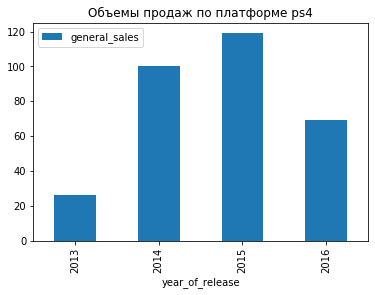

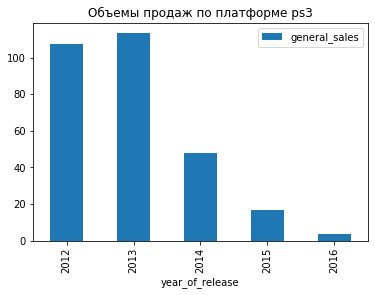

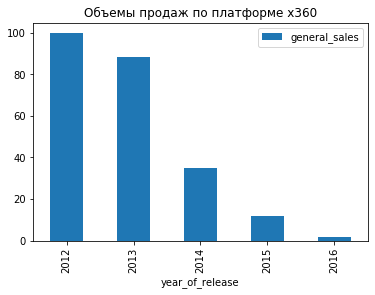

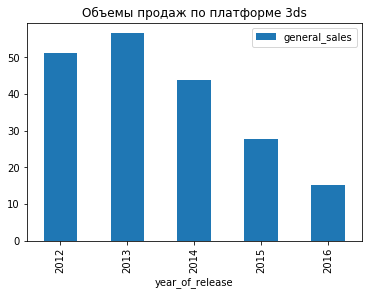

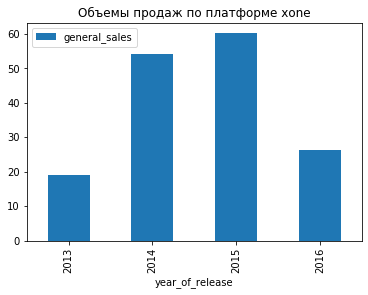

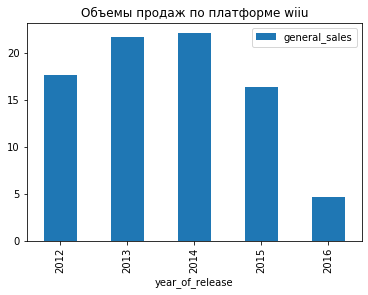

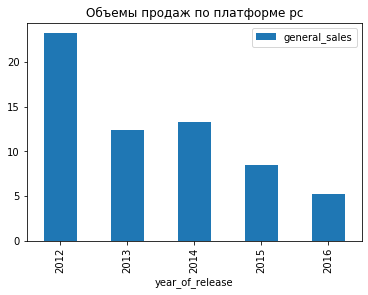

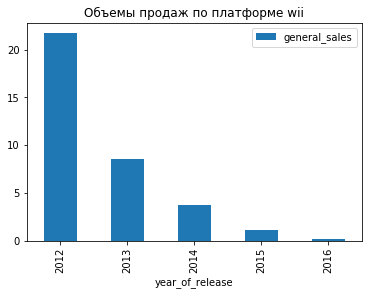

In [ ]:
for platf in dict_platform[:8]:
    df_actual_group[(df_actual_group['platform'] == platf) & (df_actual_group['year_of_release'] < 2030)]\
    .plot(x='year_of_release', y='general_sales', kind='bar', title='Объемы продаж по платформе ' + platf)

С платформами все понятно! <p>Перспективные с точки зрения объемов продаж: ps4, xone, wiiu. Они находятся вначале жизненного цикла. Популярность этих платформ в 2017 году будет еще увеличиваться.

- Посмотрим характерный разброс значений общего объема продаж по выбранным перспективным платформам.

(0, 2)

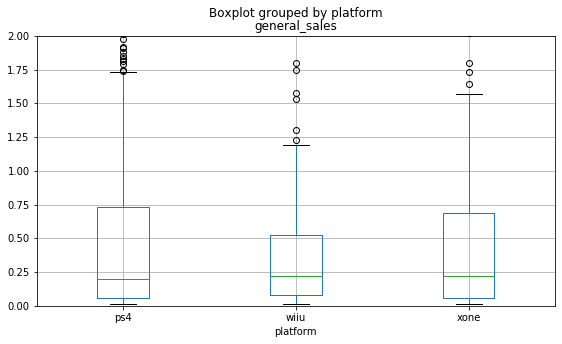

In [ ]:
df_actual.query('platform in ["ps4", "xone", "wiiu"]').boxplot('general_sales', by='platform', figsize=(9, 5))
plt.ylim(0, 2)

Платформы ps4 и xone имеют более широкое и скошенное вправо распределение, что дает повод полагться на то, что средний объем продаж будет увеличиваться.

- Посмотрим, как влияют на продажи игр платформы ps3 отзывы пользователей и критиков. 

Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

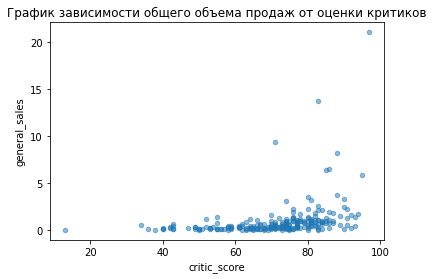

In [ ]:
df_actual.query('platform == "ps3"').plot(x='critic_score', y='general_sales', kind='scatter', alpha=0.5, title='График зависимости общего объема продаж от оценки критиков')


In [ ]:
print('Коэффициент корреляции равен: ', df_actual.query('platform == "ps3"')['critic_score'].corr(df_actual.query('platform == "ps3"')['general_sales']))

Коэффициент корреляции равен:  0.33196576243791104


In [ ]:
df_actual.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,general_sales
0,grand theft auto v,ps3,2013,action,7.02,9.09,0.98,3.96,97.00,8.20,m,21.05
1,grand theft auto v,x360,2013,action,9.66,5.14,0.06,1.41,97.00,8.10,m,16.27
2,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,nan,nan,NaN,14.63
3,pokemon x/pokemon y,3ds,2013,role-playing,5.28,4.19,4.35,0.78,nan,nan,NaN,14.60
4,call of duty: black ops ii,ps3,2012,shooter,4.99,5.73,0.65,2.42,83.00,5.30,m,13.79


Общая зависимость есть, но она слабо выражена. Сильная зависимость наблюдается после рейтинга 80. Проделаем тоже самое для рейтинга пользователей.

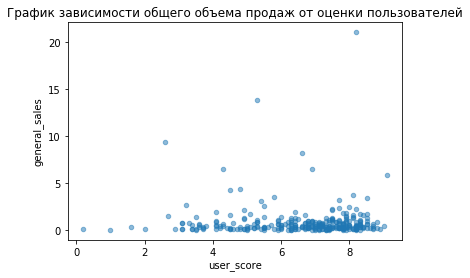

In [ ]:
df_actual.query('platform == "ps3"').plot(x='user_score', y='general_sales', kind='scatter', alpha=0.5, title='График зависимости общего объема продаж от оценки пользователей')


In [ ]:
print('Коэффициент корреляции равен: ', df_actual.query('platform == "ps3"')['user_score'].corr(df_actual.query('platform == "ps3"')['general_sales']))

Коэффициент корреляции равен:  -0.006935905712258456


Рейтинг пользователей не оказывает влияния на продажи игр. 

- Сравним полученные результаты по влиянию отзывов с другими платформами. 

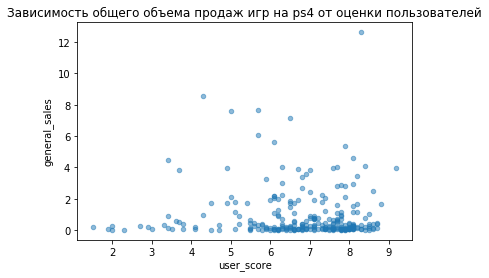

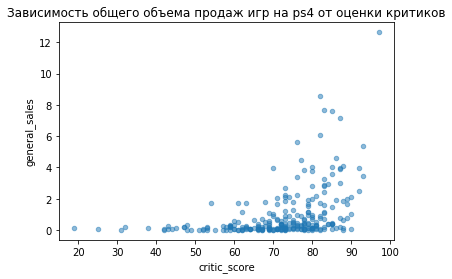

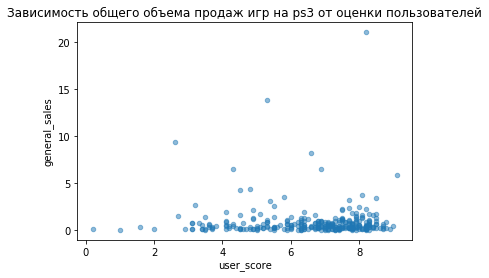

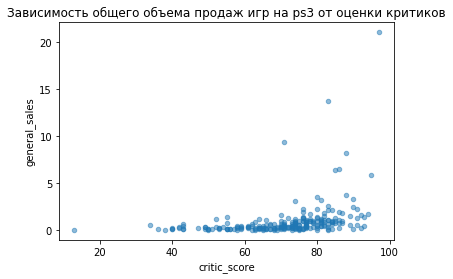

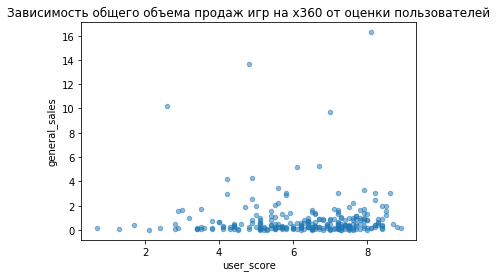

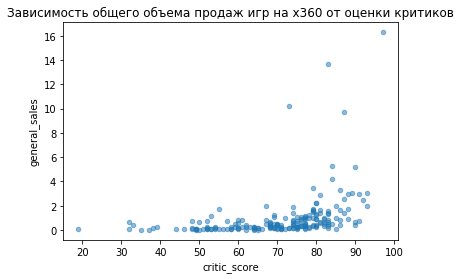

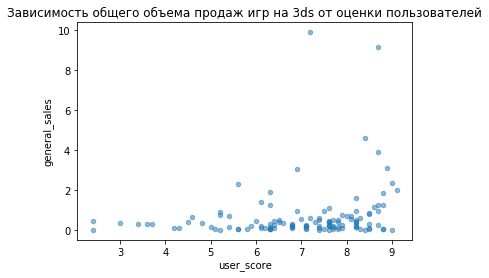

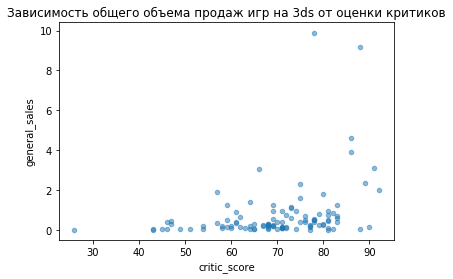

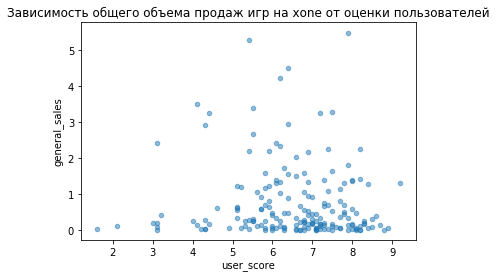

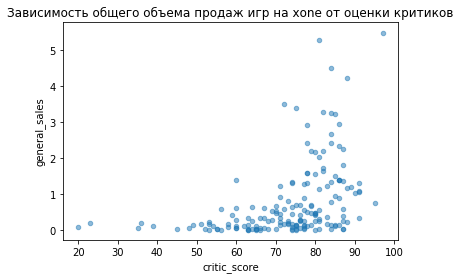

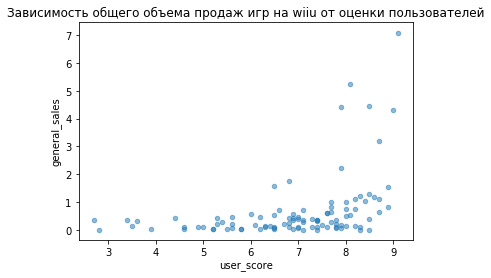

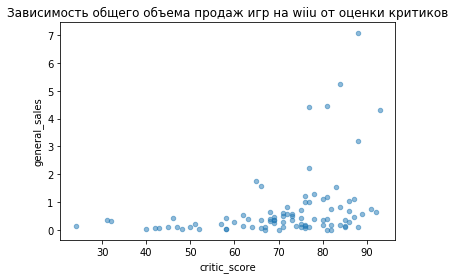

In [ ]:
for pl in dict_platform[:6]:
    df_actual.query('platform == @pl').plot(x='user_score', y='general_sales', kind='scatter', alpha=0.5, title='Зависимость общего объема продаж игр на ' + pl + ' от оценки пользователей')
    plt.show()
    df_actual.query('platform == @pl').plot(x='critic_score', y='general_sales', kind='scatter', alpha=0.5, title='Зависимость общего объема продаж игр на ' + pl + ' от оценки критиков')
    plt.show()

В целом зависимость, которую мы определили ранее сохраняется и на других платформах.

- Посмотрим на жанры выпускаемых игр. Есть ли зависимость объема продаж от жанра игры.

In [ ]:
df_actual['genre'].value_counts()

action          1093
role-playing     387
adventure        312
sports           310
shooter          262
misc             221
racing           138
fighting         121
simulation        96
platform          95
strategy          81
puzzle            39
Name: genre, dtype: int64

In [ ]:
df_actual.groupby('genre')['general_sales'].sum().sort_values(ascending=False)

genre
action         468.77
shooter        315.82
sports         202.67
role-playing   196.28
misc            97.26
platform        63.22
racing          58.68
fighting        49.36
simulation      37.13
adventure       33.69
strategy        15.00
puzzle           7.57
Name: general_sales, dtype: float64

Жанр экшен лидирует по объему продаж, причем с большим отрывом. Посмотрим на характерный разброс значений.

(0, 2)

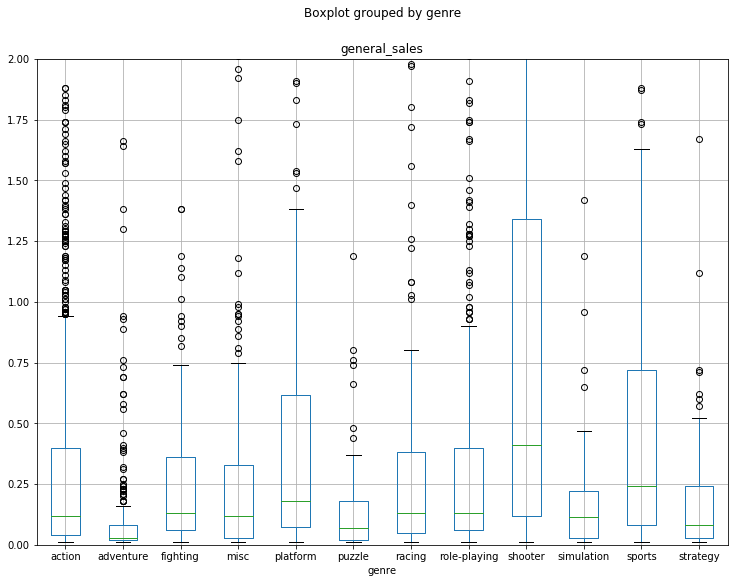

In [ ]:
df_actual.boxplot('general_sales', by='genre', figsize=(12, 9))
plt.ylim(0, 2)

Жанр экшн лидирует по общему объему продаж, но это за все время. По распределению данных более выгодными с точки зрения инвестиций являются жанры shooter, sports и platform, так как имеют более широкое распределение и более высокое медианное значение. Т.е игр этого жанра выходит меньше, чем жанра action, но с большей вероятностью игра из перечисленных жанров принесет больше продаж. Жанры приключений, стратегий и пазлов в аутсайдерах.

In [ ]:
df_actual.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,general_sales
year_of_release,1.00,-0.02,-0.06,-0.07,-0.05,-0.10,0.06,-0.05
na_sales,-0.02,1.00,0.75,0.26,0.79,0.29,-0.00,0.92
eu_sales,-0.06,0.75,1.00,0.26,0.93,0.28,-0.02,0.92
jp_sales,-0.07,0.26,0.26,1.00,0.20,0.12,0.15,0.44
other_sales,-0.05,0.79,0.93,0.20,1.00,0.27,-0.01,0.91
critic_score,-0.10,0.29,0.28,0.12,0.27,1.00,0.52,0.31
user_score,0.06,-0.00,-0.02,0.15,-0.01,0.52,1.00,0.01
general_sales,-0.05,0.92,0.92,0.44,0.91,0.31,0.01,1.00


### Вывод

- Были определены наиболее перспективные платформы, которые с большей вероятностью покажут высокие продажи в 2017 году: <strong>ps4, xone, wiiu</strong>
- Была выявлена зависимость между оценкой критиков/пользователей и объемом продаж: есть корреляция между оценкой критиков и продажами, причем она возрастает после рейтинга 80. Оценка пользователей не влияет на объемы продаж.
- Были определены жанры, которые имеют более высокие шансы на то, чтобы показать отличные продажи в 2017 г.: shooter, sports и platform. Жанры adventure, puzzle и strategy аутсайдеры нашей выборки.

## Портрет пользователя по региону

В данном разделе нам необходимо выяснить какие предпочтения у пользователей разных регионов. Какие платформы наиболее попуряны?  Какие жанры популярны ? Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [ ]:
df_actual.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,general_sales
0,grand theft auto v,ps3,2013,action,7.02,9.09,0.98,3.96,97.00,8.20,m,21.05
1,grand theft auto v,x360,2013,action,9.66,5.14,0.06,1.41,97.00,8.10,m,16.27
2,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,nan,nan,NaN,14.63
3,pokemon x/pokemon y,3ds,2013,role-playing,5.28,4.19,4.35,0.78,nan,nan,NaN,14.60
4,call of duty: black ops ii,ps3,2012,shooter,4.99,5.73,0.65,2.42,83.00,5.30,m,13.79


- Посмотрим топ-5 платформ в разных регионах

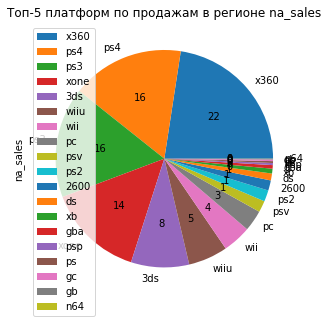

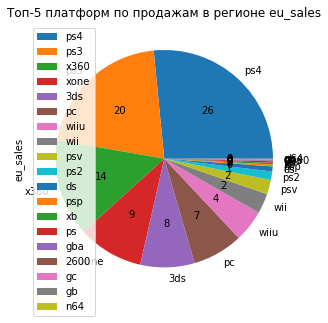

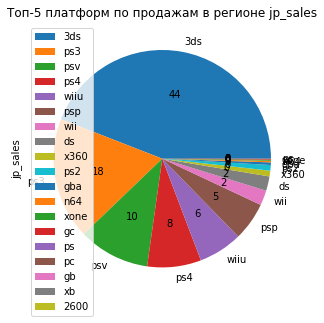

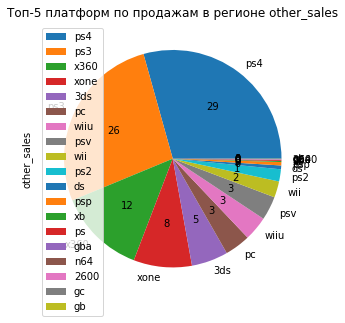

In [ ]:
columns_area = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
for column in columns_area:
    df_actual.groupby('platform').agg({column: 'sum'}).sort_values(column, ascending=False).plot(y=column, kind='pie', autopct='%d', figsize=(5, 5))
    plt.title('Топ-5 платформ по продажам в регионе ' + column)
    plt.show()

Отличия по продажам есть и они доволно любопытны. В северной америке платформа microsoft x360 занимет лидирующее место и владеет 22 % рынка, в то время как в Японии только 2%. Японский рынок сильно отличается по спросу на игры, больше 3ds и ps3 занимают более 50% рынка. Так как наш интернет-магазин продает игры по всему миру, то необходимо учесть эту особенность для продвижения в Японии. Для остальных регионов платформы playstation и xbox занимают более 50% рынка.

- Теперь посмотрим, как отличаются самые популярные жанры по регионам.

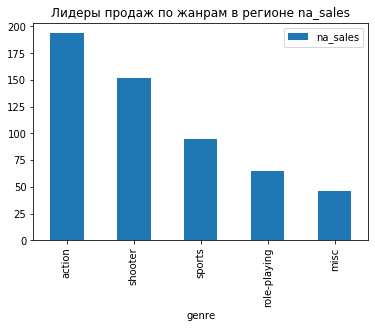

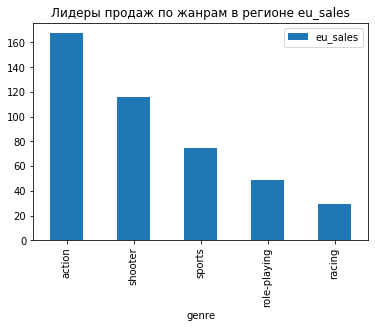

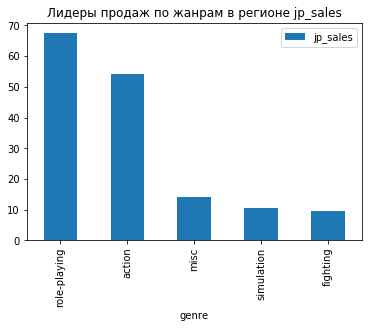

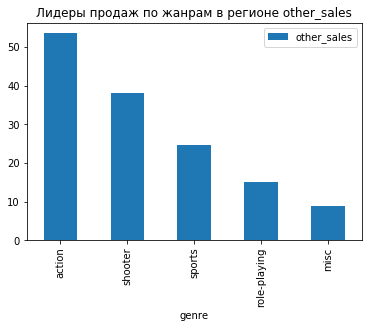

In [ ]:
for column in columns_area:
    df_actual.groupby('genre').agg({column: 'sum'}).sort_values(column, ascending=False).head(5).plot(kind='bar')
    plt.title('Лидеры продаж по жанрам в регионе ' + column)
    plt.show()

Япония и здесь отличилась жанр role-playing является самым популярным. В остальном картина схожая: экшн и шутер лидируют по продажам. Стоит также отметить, что жанр role-playing сохраняет свою популярность во всех регионах. Жанр sport довольно входит в топ 3 в регионах кроме Японии. Там даже в топ 5 не входит

- Теперь посмотрим как влияет рейтинг ESRB на продажи в Северной Америки

(0, 1.2)

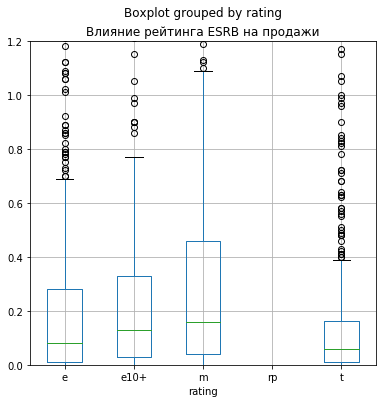

In [ ]:
df_actual.boxplot('na_sales', by='rating', figsize=(6, 6))
plt.title('Влияние рейтинга ESRB на продажи')
plt.ylim(0, 1.20)

Игры с рейтингом m - возраст 17+ в среднем имеют более высокие продажи в сравнении с другими.

### Вывод

- Выяснили самые популярные платформы в исследуемых регионах. Во всех регионах кроме Японии больше половины рынка занимают платформы playstation и xbox. В Америке более популярна xbox. В Европе и других странах популярнее playstation.
- Самые популярные жанры action и shooter, конечно же кроме Японии. Там фанатеют от ролевых игр.
- Игры с рейтингом m - возраст 17+ в среднем имеют более высокие продажи в сравнении с другими. 

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Достаточно детально проанализировали наши данные и изучили портреты пользователей.
    

    
Давай теперь проверим наши гипотезы.
    
</div>

## Проверка гипотез

- Проверим гипотезу, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Для начала посмотрим на общее распределение по этим условиям.

Text(0.5, 1.0, 'Распределение рейтинга пользователей платформы xone')

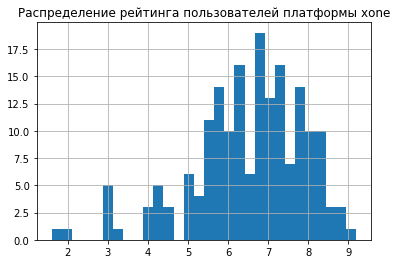

In [ ]:
df_actual.query('platform == "xone"').hist('user_score', bins=30)
plt.title('Распределение рейтинга пользователей платформы xone')

Text(0.5, 1.0, 'Распределение рейтинга пользователей платформы pc')

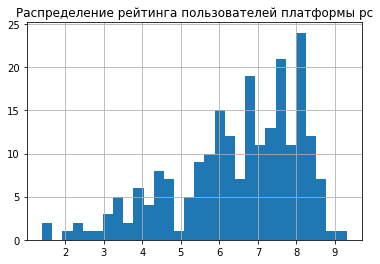

In [ ]:
df_actual.query('platform == "pc"').hist('user_score', bins=30)
plt.title('Распределение рейтинга пользователей платформы pc')

Сравним среднее и стандартное отклонение.

In [ ]:
df_actual.query('platform == "xone"')['user_score'].describe()

count   182.00
mean      6.52
std       1.38
min       1.60
25%       5.80
50%       6.80
75%       7.50
max       9.20
Name: user_score, dtype: float64

In [ ]:
df_actual.query('platform == "pc"')['user_score'].describe()

count   221.00
mean      6.46
std       1.65
min       1.40
25%       5.50
50%       6.80
75%       7.80
max       9.30
Name: user_score, dtype: float64

Среднее и стандартное отклонение 2-х выборок близки по значениям. Скорее всего гипотезу не отвергаем. Проверим

Для сравнения 2-х генеральных совокупностей по взятым выборкам будем использовать t-критерий Стьюдента, т.к сравниваем 2 независимые выборки.

Сформулируем нулевую и альтернативную гипотезы. 
<p>Нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC равны.</p>
<p>Альтернативная гипотеза: средние пользовательские рейтинги платформ Xbox One и PC не равны.</p>
Уровень статистической значимости возьмем 5%

Гипотезу отвергаем если p_value < 0.05 и не отвергаем если p_value > 0.05

In [ ]:
alpha = 0.05
xone = df_actual.query('platform =="xone" and user_score > 0')['user_score']
pc = df_actual.query('platform =="pc" and user_score > 0')['user_score']
result1 = st.ttest_ind(xone, pc)
print('p-значение: ', result1.pvalue)

p-значение:  0.6881350504357912


Гипотезу не отвергаем, т.к p-значение > 0.05

- Проверим гипотезу, что пользовательские рейтинги жанров Action и Sports разные.

count   557.00
mean      6.83
std       1.38
min       1.60
25%       6.30
50%       7.10
75%       7.80
max       9.10
Name: user_score, dtype: float64

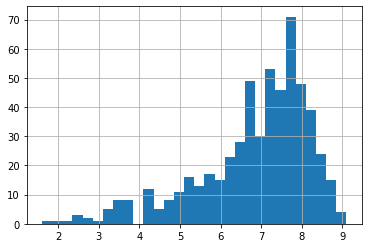

In [ ]:
df_actual.query('genre == "action"')['user_score'].hist(bins=30)
display(df_actual.query('genre == "action"')['user_score'].describe())

count   217.00
mean      5.66
std       1.78
min       0.20
25%       4.40
50%       5.90
75%       7.00
max       8.80
Name: user_score, dtype: float64

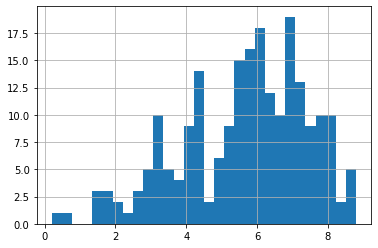

In [ ]:
df_actual.query('genre == "sports"')['user_score'].hist(bins=30)
display(df_actual.query('genre == "sports"')['user_score'].describe())

Нулевая гипотеза: рейтинг пользователей жанра Action и Sport равны.
<p> Альтернативная гипотеза:  рейтинг пользователей жанра Action и Sport не равны.</p>
Уровень статистической значимости равен 5%

In [ ]:
action = df_actual.query('genre == "action" and user_score > 0')['user_score']
sport = df_actual.query('genre == "sports" and user_score > 0')['user_score']
result2 = st.ttest_ind(action, sport)
print('p-значение: ', result2.pvalue)

p-значение:  4.3980992921502846e-21


Нулевая гипотеза не подтвердилась p-значение < 0.05. А это значит, что средние рейтинги пользователей для жанра sports и action разные.

### Вывод

- Была подтверждена гипотеза о том, что средние пользовательские рейтинги для платформ xbox one и PC равны.
- Была подтверждена гипотеза о том, что средние пользовательские рейтинги для жанров action и sport разные. 

## 4. Выводы

Целью данного исследования было выявить параметры, влияющие на объемы продаж игры. В результате анализа были сделаны следующие выводы:
- Количество выпускаемых игр снижается с 2009 года. При том, что в денежном выражении рынок растет от года к году. Это связано прежде всего с консолидацией рынка. Крупные игроки playstation и Micrisoft забирают большую часть рынка и повышают планку качества игр, что позволяет выпускать меньше игр, но более качественных и которые собирают больше денег.
- Средняя продолжительность жизни платформы составляет 10 лет. Такой вывод был сделан по распределению общего объема продаж игр на этой платформе по годам. Оказалось, что есть закономерность у всех платформ: 5 лет платформа набирает популярность, а затем еще 5 угасает и на смену ей приходит новая платформа. В дальнейших выводах результыты касаются только тех игр, которые вышли с 2012 года, тем самым данные будет актуальны для прогноза в 2017 году.
- С точки зрения общего тренда в 2017 году будут популярны следующие платформы: ps4, xbox one, wiiu. Но в некоторых регионах есть различия.
- Была выявлена зависимость оценки критиков от объема продаж. Причем игры с оценками выше 8.0 сильно увеличивают вероятность больших продаж. Что нельзя сказать про рейтинг пользователей. Здесь высокие или низкие оценки не влияют на продажи.
- Были определены жанры, которые имеют более высокие шансы на то, чтобы показать отличные продажи в 2017 г.: shooter, sports и platform. В среднем они имеют более высокие продажи, даже с учетом того, что игр жанра action выпускается гораздо больше. Жанры adventure, puzzle и strategy аутсайдеры нашей выборки.
- Сравнение регионов показало, что в Японии свои предпочтения к жанру игр и платформам. За исследуемый период самая продаваемая платформа 3ds, далее идет playstation. Вероятнее всего, что в 2017 году ps4 будет лидирующей в Японии. xbox в Японии практически не продается. Жанры Role-playing и action самые популярные в Японии.
- В других регионах схожая картина: самые популярные платформы: playstation и xbox. Они занимают больше 50% рынка. Самые популярные жанры: action, shooter, sport и role-playing.
